**Name : Vaishakh Nair**

**Job-a-thon Submission**

# EDA

In [1]:
#importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#reading the training file
df_train = pd.read_csv("train_Df64byy.csv")

In [3]:
#observing the content of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
#checking the numeric data
df_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
#cheching the dimensions of train dataset
df_train.shape

(50882, 14)

In [6]:
#observing first 10 rows of train dataset
df_train.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


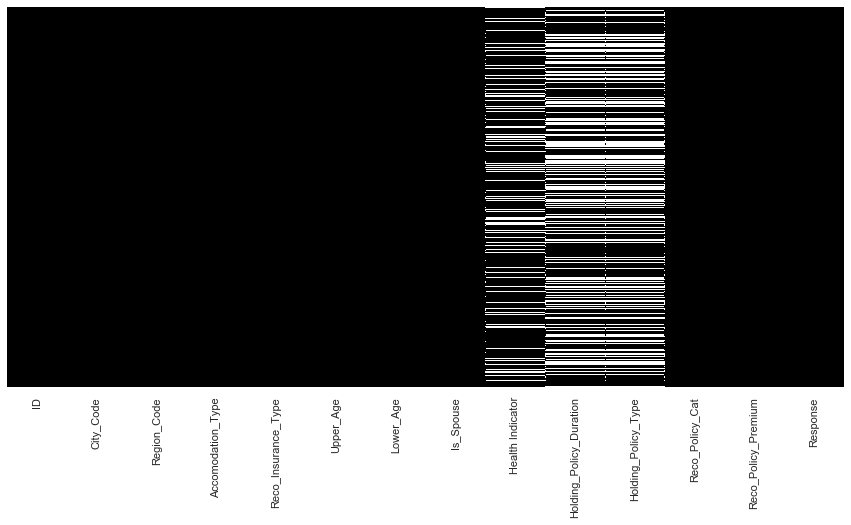

In [7]:
#plotting missing values
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(df_train.isnull(), yticklabels= False, cbar=False, cmap ='binary_r')

In [8]:
#checking null values in features
df_train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [9]:
#checking percentage of missing values

In [10]:
percent_missing_1 = df_train["Health Indicator"].isnull().sum() * 100 / len(df_train)
print(round(percent_missing_1,3))

22.977


In [11]:
percent_missing_2 = df_train["Holding_Policy_Duration"].isnull().sum() * 100 / len(df_train)
print(round(percent_missing_2,3))

39.8


In [12]:
percent_missing_3 = df_train["Holding_Policy_Type"].isnull().sum() * 100 / len(df_train)
print(round(percent_missing_3,3))

39.8


In [13]:
#checking mode and median values to be imputed
print(df_train['Health Indicator'].mode())
print(df_train['Holding_Policy_Duration'].mode())
print(df_train['Holding_Policy_Type'].median())

0    X1
dtype: object
0    1.0
dtype: object
3.0


In [14]:
#replacing the missing values with mode and median
df_train['Health Indicator'].fillna(str(df_train['Health Indicator'].mode().values[0]), inplace=True)
df_train['Holding_Policy_Duration'].fillna(str(df_train['Holding_Policy_Duration'].mode().values[0]), inplace=True)
df_train['Holding_Policy_Type'].fillna(df_train['Holding_Policy_Type'].median(), inplace=True)

In [15]:
#checking if missing values have been handled or not
df_train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [16]:
#checking for duplicate values
df_train[df_train.duplicated()]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response


In [17]:
df_train.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

cross-tabulation helps us understand how two variables are related to each other.
There will be comparison of several features wrt "Response"/ Target variable to understand how they are related

In [18]:
#comparing city code with Response
comparison_1 = pd.crosstab(df_train['City_Code'],df_train['Response'],margins = True)
comparison_1

Response,0,1,All
City_Code,,,
C1,6765,2208,8973
C10,1247,364,1611
C11,868,279,1147
C12,670,198,868
C13,750,255,1005
C14,570,176,746
C15,933,253,1186
C16,866,269,1135
C17,894,265,1159


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

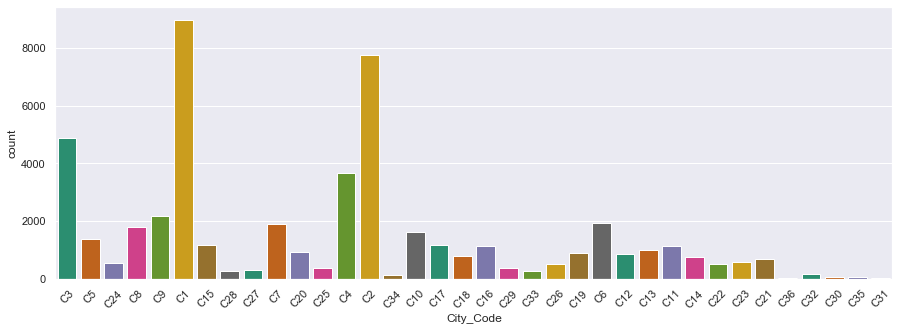

In [19]:
#count-plot for City Code
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["City_Code"], palette= "Dark2")
plt.xticks(rotation = 45)

In [20]:
#comparing Health Indicator with Response
comparison_2 = pd.crosstab(df_train['Health Indicator'],df_train['Response'],margins = True)
comparison_2

Response,0,1,All
Health Indicator,,,
X1,18787,5914,24701
X2,7841,2491,10332
X3,5163,1599,6762
X4,4347,1396,5743
X5,1319,408,1727
X6,973,307,1280
X7,134,62,196
X8,60,18,78
X9,49,14,63


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

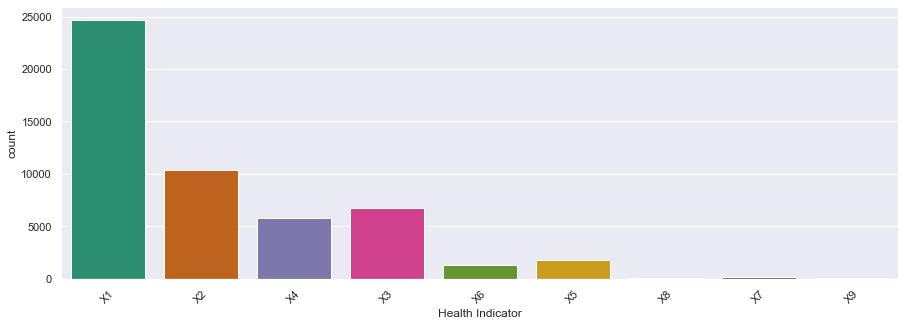

In [21]:
#count plot of Health Indicator
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["Health Indicator"], palette= "Dark2")
plt.xticks(rotation = 45)

In [22]:
#comparing Holding Policy Duration with Response
comparison_3 = pd.crosstab(df_train['Holding_Policy_Duration'],df_train['Response'],margins = True)
comparison_3

Response,0,1,All
Holding_Policy_Duration,,,
1.0,18914,5836,24750
10.0,591,222,813
11.0,409,137,546
12.0,383,130,513
13.0,373,138,511
14+,3248,1087,4335
14.0,351,115,466
2.0,3249,1011,4260
3.0,2754,832,3586


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

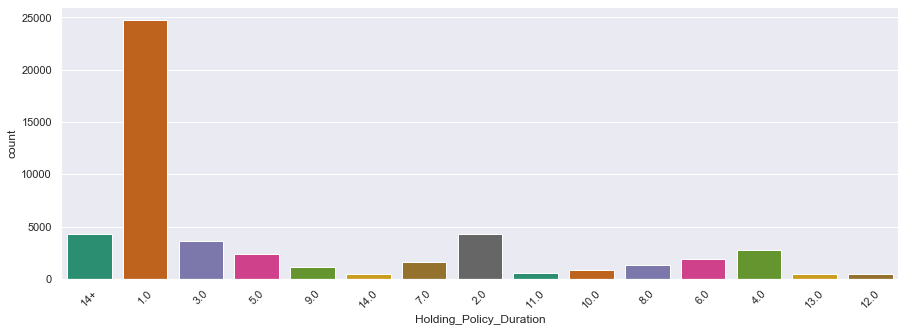

In [23]:
#count plot for Holding Policy Duration
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["Holding_Policy_Duration"], palette= "Dark2")
plt.xticks(rotation = 45)

In [24]:
#comparing Holding Policy Type with Response
comparison_4 = pd.crosstab(df_train['Holding_Policy_Type'],df_train['Response'],margins = True)
comparison_4

Response,0,1,All
Holding_Policy_Type,,,
1.0,6246,1927,8173
2.0,3815,1190,5005
3.0,25474,8056,33530
4.0,3138,1036,4174
All,38673,12209,50882


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

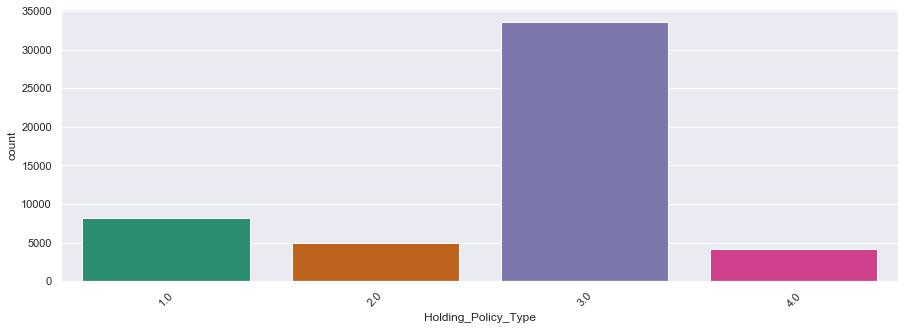

In [25]:
#count plot for Holding policy Type
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["Holding_Policy_Type"], palette= "Dark2")
plt.xticks(rotation = 45)

In [26]:
#comparing Reco Policy Cat with Response
comparison_5 = pd.crosstab(df_train['Reco_Policy_Cat'],df_train['Response'],margins = True)
comparison_5

Response,0,1,All
Reco_Policy_Cat,,,
1,1959,8,1967
2,1663,254,1917
3,854,205,1059
4,940,75,1015
5,714,293,1007
6,704,147,851
7,679,155,834
8,567,209,776
9,658,131,789


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

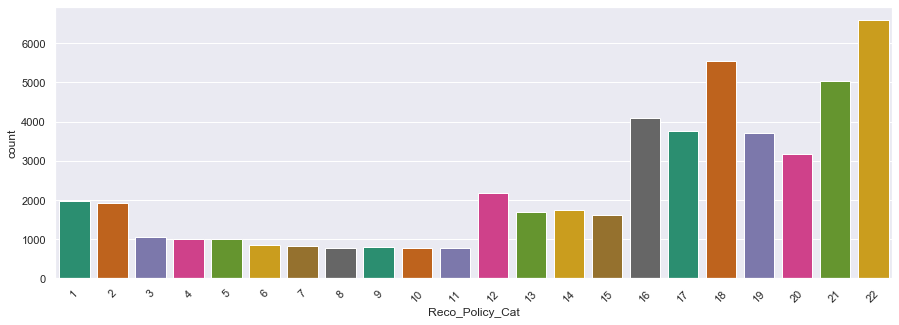

In [27]:
#count plot for Reco Policy Cat
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["Reco_Policy_Cat"], palette= "Dark2")
plt.xticks(rotation = 45)

In [28]:
#comparing Upper Age with Response
comparison_6 = pd.crosstab(df_train['Upper_Age'],df_train['Response'],margins = True)
comparison_6

Response,0,1,All
Upper_Age,,,
18,89,27,116
19,412,103,515
20,584,174,758
21,878,250,1128
22,1190,373,1563
23,1312,359,1671
24,1285,367,1652
25,1247,397,1644
26,1105,356,1461


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text xticklabel objects>)

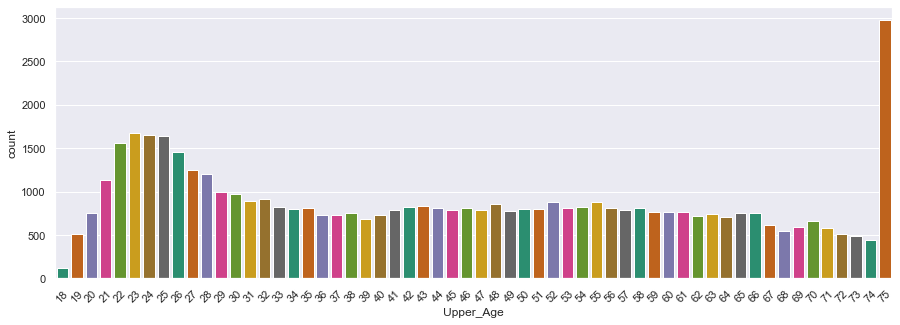

In [29]:
#count plot for Upper Age
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["Upper_Age"], palette= "Dark2")
plt.xticks(rotation = 45)

In [30]:
#comparing Lower Age with Response
comparison_7 = pd.crosstab(df_train['Lower_Age'],df_train['Response'],margins = True)
comparison_7

Response,0,1,All
Lower_Age,,,
16,203,80,283
17,156,50,206
18,268,91,359
19,593,160,753
20,744,241,985
...,...,...,...
72,334,86,420
73,326,105,431
74,302,93,395


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

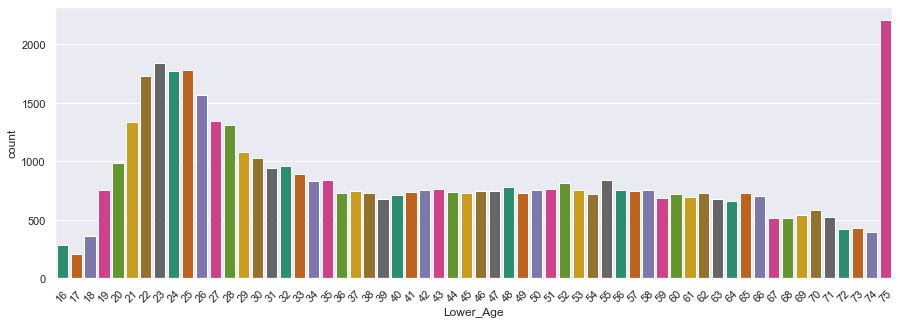

In [31]:
#Count plot of Lower Age
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df_train["Lower_Age"], palette= "Dark2")
plt.xticks(rotation = 45)

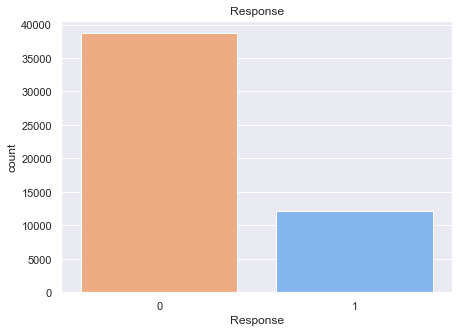

In [32]:
#Value distribution of Response
sns.set(rc={'figure.figsize':(7,5)})
plt.title('Response')
sns.countplot(df_train["Response"], palette=["#ffa872", "#72b4ff"])

In [33]:
df_train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

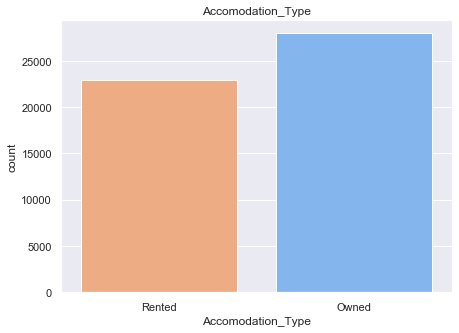

In [34]:
#Value distribution of Accomodation Type
sns.set(rc={'figure.figsize':(7,5)})
plt.title('Accomodation_Type')
sns.countplot(df_train["Accomodation_Type"], palette=["#ffa872", "#72b4ff"])

In [35]:
df_train['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

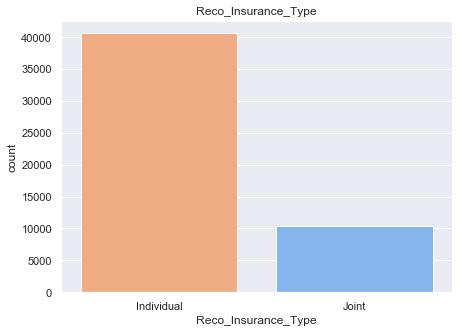

In [36]:
#value distribution of Reco Insurance Type
sns.set(rc={'figure.figsize':(7,5)})
plt.title('Reco_Insurance_Type')
sns.countplot(df_train["Reco_Insurance_Type"], palette=["#ffa872", "#72b4ff"])

In [37]:
df_train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

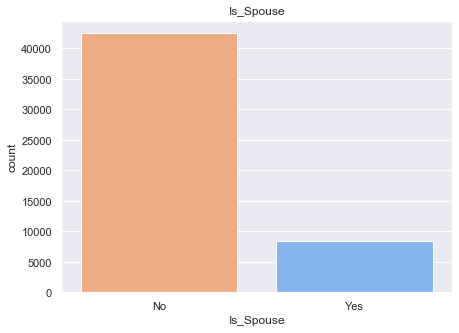

In [38]:
#value distribution of Is Spouse
sns.set(rc={'figure.figsize':(7,5)})
plt.title('Is_Spouse')
sns.countplot(df_train["Is_Spouse"], palette=["#ffa872", "#72b4ff"])

In [39]:
df_train['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

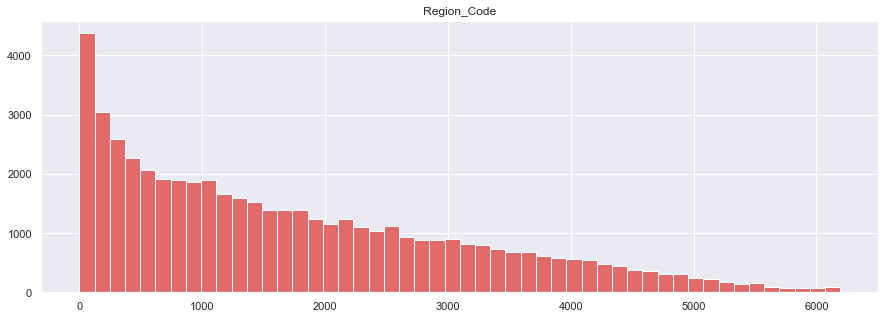

In [40]:
#Distribution of Region Code
plt.figure(figsize=(15,5))
plt.title('Region_Code')
df_train['Region_Code'].hist(bins=50, color = "#E26A6A")

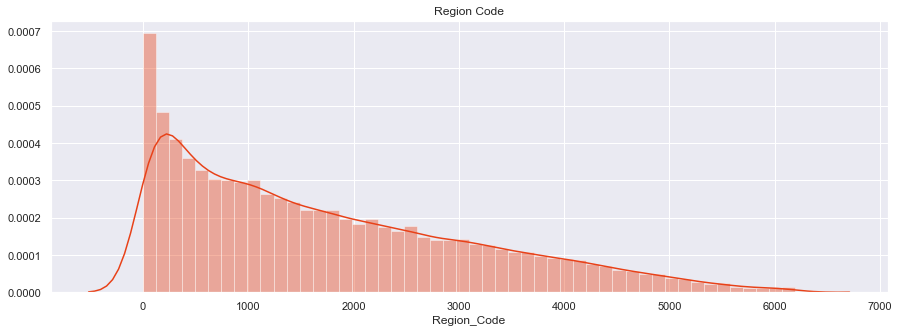

In [41]:
sns.set(rc={'figure.figsize':(15,5)})
plt.title('Region Code')
sns.distplot(df_train["Region_Code"], color ="#e84118")

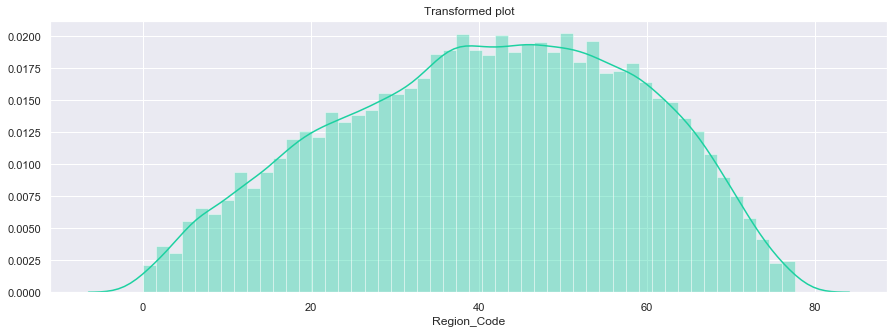

In [42]:
#Transformation Plot using BoxCox
from scipy import stats
df_train["Region_Code"] = stats.boxcox(df_train['Region_Code'])[0]
plt.title('Transformed plot')
sns.distplot(df_train["Region_Code"], color = "#1dd1a1")

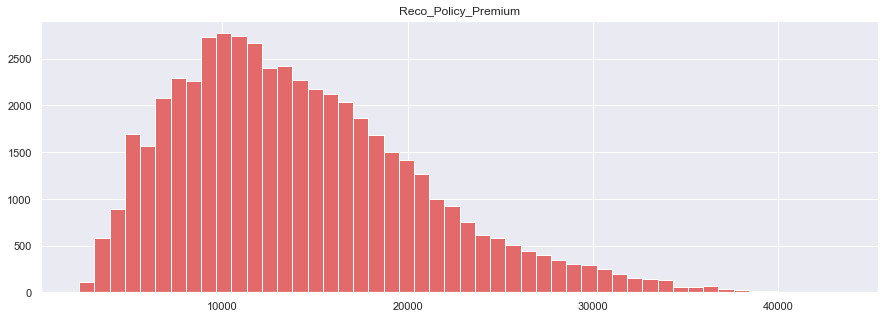

In [43]:
#Distribution of Reco Policy Premium
plt.figure(figsize=(15,5))
plt.title('Reco_Policy_Premium')
df_train['Reco_Policy_Premium'].hist(bins=50, color = "#E26A6A")

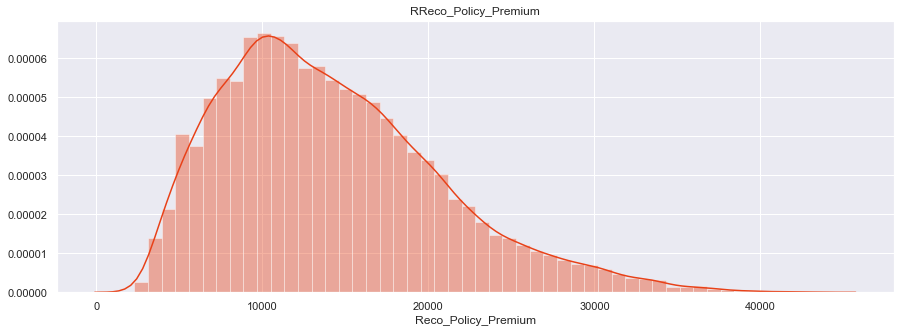

In [44]:
sns.set(rc={'figure.figsize':(15,5)})
plt.title('RReco_Policy_Premium')
sns.distplot(df_train["Reco_Policy_Premium"], color ="#e84118")

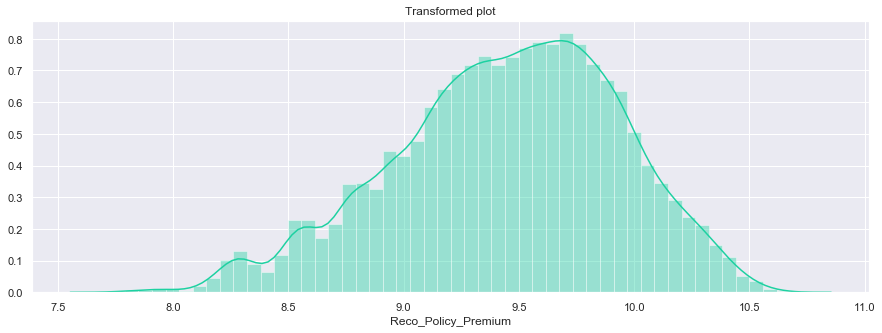

In [45]:
#Transformation Plot using log transfprm
df_train['Reco_Policy_Premium'] = np.log(df_train['Reco_Policy_Premium'])
plt.title('Transformed plot')
sns.distplot(df_train["Reco_Policy_Premium"], color = "#1dd1a1")

In [46]:
#grouped boxplots

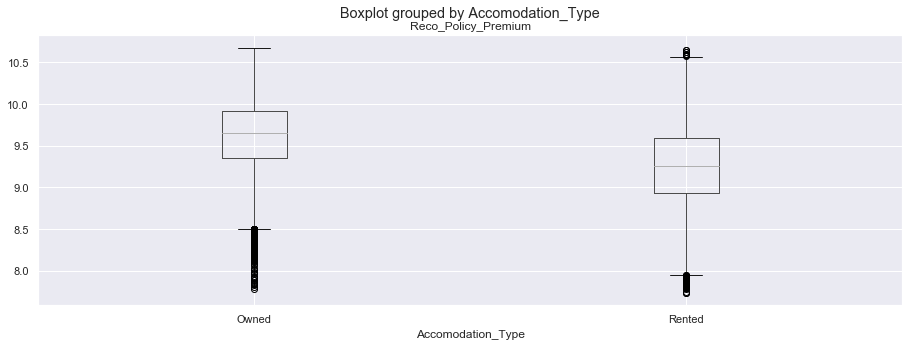

In [47]:
df_train.boxplot(column='Reco_Policy_Premium', by = 'Accomodation_Type')

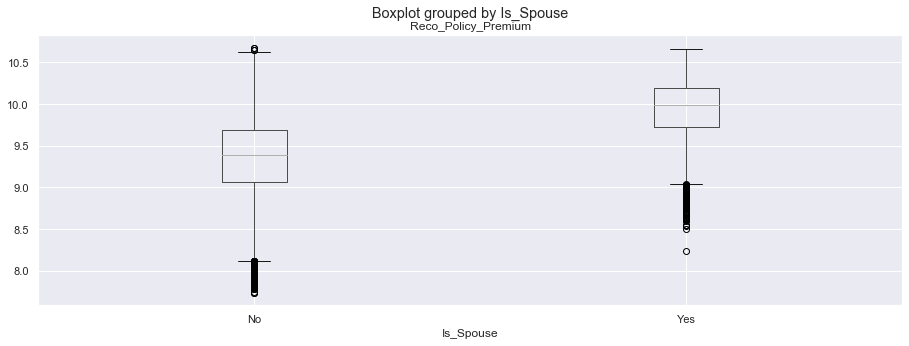

In [48]:
df_train.boxplot(column='Reco_Policy_Premium', by = 'Is_Spouse')

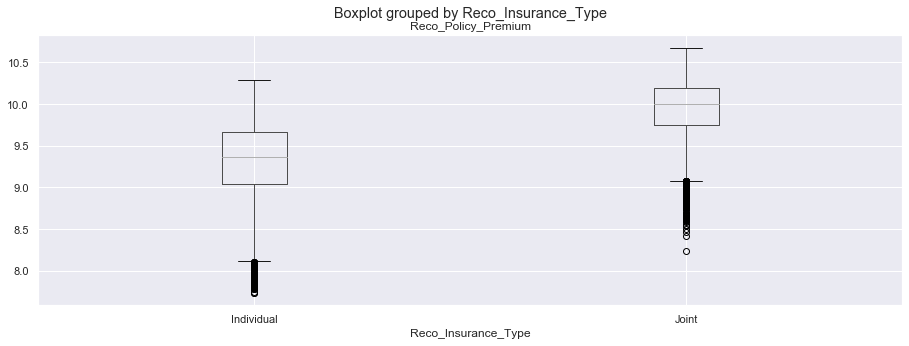

In [49]:
df_train.boxplot(column='Reco_Policy_Premium', by = 'Reco_Insurance_Type')

# Feature engineering and selection

In [50]:
df_train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,59.315667,Rented,Individual,36,36,No,X1,14+,3.0,22,9.361171,0
1,2,C5,38.168407,Owned,Joint,75,22,No,X2,1.0,3.0,22,10.325810,0
2,3,C5,63.094433,Owned,Individual,32,32,No,X1,1.0,1.0,19,8.915969,1
3,4,C24,67.377911,Owned,Joint,52,48,No,X1,14+,3.0,19,9.785830,0
4,5,C8,50.604765,Rented,Individual,44,44,No,X2,3.0,1.0,16,9.249946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,33.910029,Rented,Individual,22,22,No,X3,1.0,3.0,18,8.949495,0
50878,50879,C5,66.160158,Rented,Individual,27,27,No,X3,7.0,3.0,4,8.595635,0
50879,50880,C1,25.661779,Rented,Individual,63,63,No,X2,14+,1.0,12,9.339085,0
50880,50881,C1,1.847288,Owned,Joint,71,49,No,X2,2.0,2.0,16,10.246339,1


In [51]:
#frequency encoding

In [52]:
fq_1 = df_train.groupby('City_Code').size()/len(df_train)     
df_train.loc[:, "{}_freq_encode".format('City_Code')] = df_train['City_Code'].map(fq_1)   
df_train = df_train.drop(['City_Code'], axis = 1)  

In [53]:
fq_2 = df_train.groupby('Accomodation_Type').size()/len(df_train)     
df_train.loc[:, "{}_freq_encode".format('Accomodation_Type')] = df_train['Accomodation_Type'].map(fq_2)   
df_train = df_train.drop(['Accomodation_Type'], axis = 1)  

In [54]:
fq_3 = df_train.groupby('Reco_Insurance_Type').size()/len(df_train)     
df_train.loc[:, "{}_freq_encode".format('Reco_Insurance_Type')] = df_train['Reco_Insurance_Type'].map(fq_3)   
df_train = df_train.drop(['Reco_Insurance_Type'], axis = 1)  

In [55]:
fq_4 = df_train.groupby('Is_Spouse').size()/len(df_train)     
df_train.loc[:, "{}_freq_encode".format('Is_Spouse')] = df_train['Is_Spouse'].map(fq_4)   
df_train = df_train.drop(['Is_Spouse'], axis = 1)  

In [56]:
fq_5 = df_train.groupby('Health Indicator').size()/len(df_train)     
df_train.loc[:, "{}_freq_encode".format('Health Indicator')] = df_train['Health Indicator'].map(fq_5)   
df_train = df_train.drop(['Health Indicator'], axis = 1)  

In [57]:
fq_6 = df_train.groupby('Holding_Policy_Duration').size()/len(df_train)     
df_train.loc[:, "{}_freq_encode".format('Holding_Policy_Duration')] = df_train['Holding_Policy_Duration'].map(fq_6)   
df_train = df_train.drop(['Holding_Policy_Duration'], axis = 1)  

In [58]:
#Undersampling the number of responses with 0
rslt_df = df_train.sort_values(by = 'Response')
df = rslt_df.iloc[36000:]
df_train = df

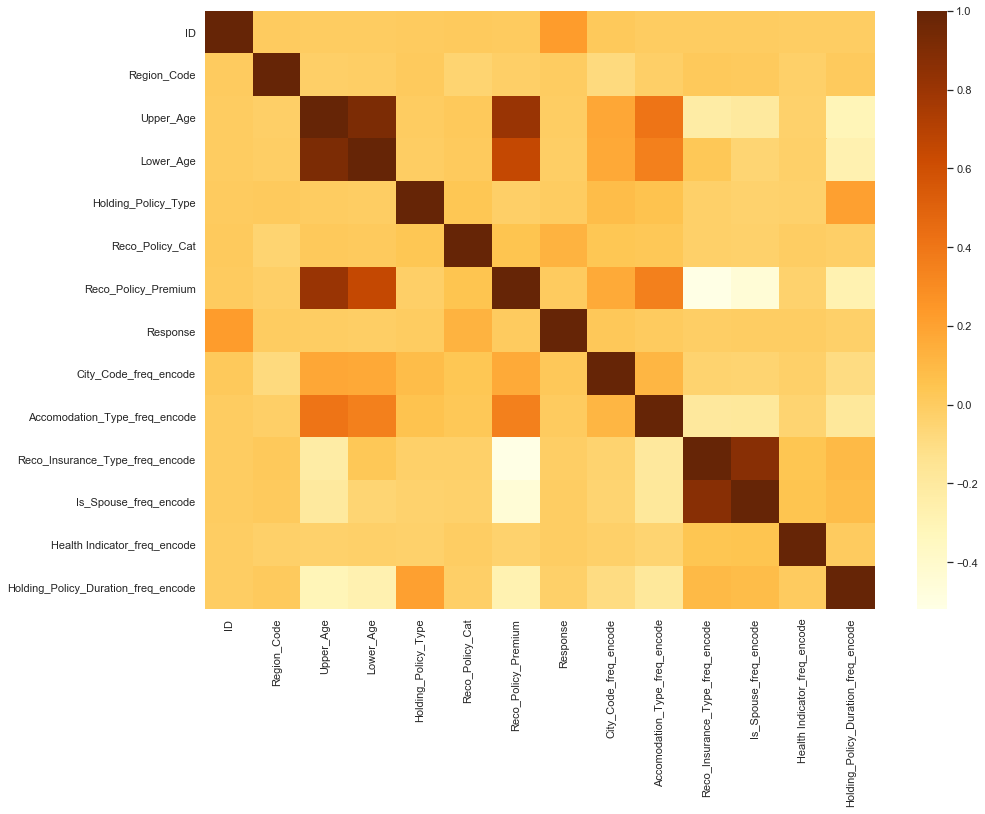

In [59]:
#Correlation matrix and correlated features
plt.figure(figsize=(15,11))
corr = df_train.corr()
sns.heatmap(corr, annot = False, cmap = "YlOrBr")
plt.show()

In [60]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [61]:
correlated_features = correlation(df_train, 0.6)
len(set(correlated_features))

3

In [62]:
#Removing ID and Correlated features
df_train.drop("ID", axis=1, inplace = True)
df_train.drop(correlated_features, axis=1, inplace = True)

# Model Creation ( with tuned parameters )

In [63]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [64]:
X = df_train.drop("Response", axis =1)
y = df_train["Response"]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [66]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

In [67]:
os=RandomOverSampler(1)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 9776, 0: 2129})
The number of classes after fit Counter({1: 9776, 0: 9776})


In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_ns = sc.fit_transform(X_train_ns)
X_test = sc.fit_transform(X_test)

In [77]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    learning_rate= 0.8,
                                    loss_function='Logloss',
                                   eval_metric="F1")

In [78]:
catboost_model.fit(X_train_ns, y_train_ns,
                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6596452	total: 9.56ms	remaining: 9.55s
1:	learn: 0.6016144	total: 17.7ms	remaining: 8.81s
2:	learn: 0.6128588	total: 25.8ms	remaining: 8.58s
3:	learn: 0.6133256	total: 33.6ms	remaining: 8.37s
4:	learn: 0.6157269	total: 41.1ms	remaining: 8.17s
5:	learn: 0.6235311	total: 48.3ms	remaining: 7.99s
6:	learn: 0.6276512	total: 55.6ms	remaining: 7.89s
7:	learn: 0.6350729	total: 63.6ms	remaining: 7.89s
8:	learn: 0.6413038	total: 72ms	remaining: 7.93s
9:	learn: 0.6471884	total: 79.6ms	remaining: 7.88s
10:	learn: 0.6491661	total: 87.4ms	remaining: 7.86s
11:	learn: 0.6567179	total: 94.5ms	remaining: 7.78s
12:	learn: 0.6600148	total: 104ms	remaining: 7.91s
13:	learn: 0.6644305	total: 112ms	remaining: 7.86s
14:	learn: 0.6670323	total: 119ms	remaining: 7.81s
15:	learn: 0.6675979	total: 126ms	remaining: 7.74s
16:	learn: 0.6708886	total: 133ms	remaining: 7.72s
17:	learn: 0.6769770	total: 141ms	remaining: 7.68s
18:	learn: 0.6789657	total: 148ms	remaining: 7.65s
19:	learn: 0.6850398	total: 156

In [79]:
y_pred = catboost_model.predict(X_test)

In [80]:
print(accuracy_score(y_test, y_pred))

0.7312730937185086


In [ ]:
0.032384